In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from knn import KNN

from matplotlib.colors import  ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [42]:
female_data = pd.read_csv("data/ANSUR_II_FEMALE_Public.csv")
male_data = pd.read_csv("data/ANSUR_II_MALE_Public.csv",encoding="latin-1")
data = pd.concat([female_data,male_data])


Preprocess dateset

In [43]:
data["weightkg"] =data["weightkg"] /10
data["stature"]= data["stature"] / 10
data["biacromialbreadth"] = data["biacromialbreadth"] / 10
data["Gender"]=data["Gender"].replace(["Female","Male"],[0,1])

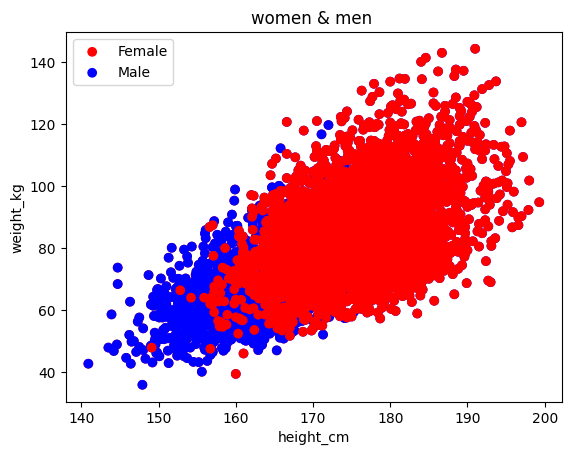

In [44]:
cmap =["red","blue"]
plt.scatter(data["stature"],data["weightkg"], c=data["Gender"]==1 ,cmap=ListedColormap(cmap),label="Female")
plt.scatter(data["stature"],data["weightkg"], c=data["Gender"]==0 ,cmap=ListedColormap(cmap),label="Male")

plt.legend(["men","women"])
plt.title("women & men ")
plt.xlabel("height_cm")
plt.ylabel("weight_kg")
plt.legend(loc='best')
plt.show()

Text(0.5, 0, 'height_cm')

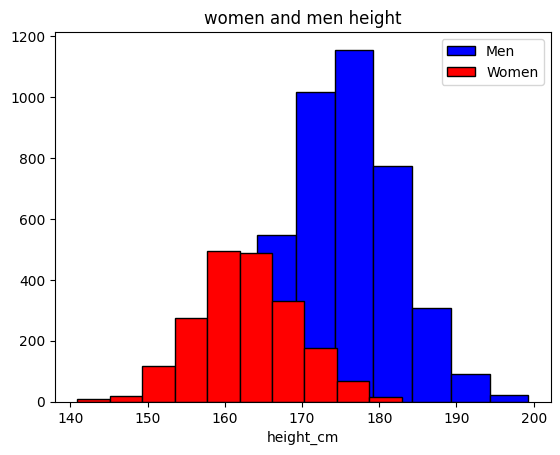

In [45]:
women_hg = data.query("Gender == 0 ")["stature"]
men_hg   = data.query("Gender == 1 ")["stature"]

plt.hist(men_hg ,color= 'blue'  , edgecolor="black" )
plt.hist( women_hg ,color="red" , edgecolor="black" )

plt.title("women and men height")
plt.legend(["Men" , "Women" ])
plt.xlabel("height_cm")

A

‌B. Why is the data of men more right than the data of women?

In [46]:
Women_height = data.query('Gender == 0 ')['stature'].mean()   # Average height of Women
Men_height = data.query('Gender == 1 ')['stature'].mean()   # Average height of Men
Women_height #162.84733131923463
Men_height  #175.62146006859385

175.62146006859385

In [47]:
X_test = data[['stature' , 'weightkg' , "biacromialbreadth"]].reset_index()
X_test

,index,stature,weightkg,biacromialbreadth
0,0,156.0,65.7,37.3
1,1,166.5,53.4,37.2
2,2,171.1,66.3,39.7
3,3,166.0,78.2,38.4
4,4,157.2,88.6,37.8
...,...,...,...,...
6063,4077,168.8,67.5,38.4
6064,4078,176.5,89.6,42.8
6065,4079,169.0,83.2,40.7
6066,4080,171.8,73.1,41.9


4

In [48]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(data[['weightkg','stature','Gender']], test_size=0.2, random_state=25)
testing_data

,weightkg,stature,Gender
2460,96.5,171.6,1
549,54.7,159.7,0
3470,116.6,184.7,1
451,57.4,166.0,0
2782,66.7,170.3,1
...,...,...,...
2706,71.3,166.0,1
3452,87.5,166.8,1
775,82.7,158.2,0
338,70.2,166.4,0


5

In [49]:
X_train  = data[["stature" , "weightkg" , "biacromialbreadth"]] 
X_train = np.array(X_train)
X_test  = data[["stature" , "weightkg" , "biacromialbreadth"]] 
X_test = np.array(X_test)
Y_train = data['Gender']
Y_train = np.array(Y_train)
Y_test = data["Gender"]
Y_test = np.array(Y_test)

test1 = np.array([170.2 , 85.1 ,36])
test2 = np.array([150.3  , 45.9 , 30])
test3 = np.array([180.4 , 90.5 , 44])
test4 = np.array([170 , 70 , 42])

knn = KNN(7)
knn.fit(X_train , Y_train)

listof_new_persons  = [test1 ,test2 , test3 , test4]
outputs = knn.predict(listof_new_persons)
for output in outputs :
    if output == 0 :
        print("👩🏻‍🦰")
    elif output == 1 :
        print("👱🏻‍♂️")

👩🏻‍🦰
👩🏻‍🦰
👱🏻‍♂️
👱🏻‍♂️


6

In [ ]:

Y_test = data['Gender'].to_numpy()
for k in [3, 5, 7, 10, 15]:
    knn = KNN(k)
    knn.fit(data[['weightkg','stature']].to_numpy(), data['Gender'].to_numpy())

    score = knn.evaluate(data[['weightkg','stature']].to_numpy(), Y_test)
    print(f'Score in k = {k} is {score*100:.1f}%.')

3	83.1% ,
7	84.9% ,
10	 85.2%,
15	 85.1% ,


7

In [54]:

y_test=data['Gender'].to_numpy()
for k in [3, 7, 10, 15, 17]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data[['weightkg','stature']], data['Gender'])
    y_preds = knn.predict(data[['weightkg','stature']])
    score = np.sum(y_preds == y_test) / y_preds.shape[0]
    print(f'Score in k = {k} is {score*100:.1f}%.')

Score in k = 3 is 89.5%.
Score in k = 7 is 87.2%.
Score in k = 10 is 86.8%.
Score in k = 15 is 86.4%.
Score in k = 17 is 86.2%.


8


9

In [56]:
y_test = data['Gender'].to_numpy()
for k in [3, 7, 10, 15, 17]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data[['weightkg','stature']], data['Gender'])
    
    y_preds = knn.predict(data[['weightkg','stature']])
    score = np.sum(y_preds == y_test) / y_preds.shape[0]
    print(f'Score in k = {k} is {score*100:.1f}%.1')

Score in k = 3 is 89.5%.1
Score in k = 7 is 87.2%.1
Score in k = 10 is 86.8%.1
Score in k = 15 is 86.4%.1
Score in k = 17 is 86.2%.1


In [57]:
# _+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+
y_test = data['Gender'].to_numpy()
for k in [3, 7, 10, 15, 17]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data[['weightkg','Gender']], data['Gender'])
    y_preds = knn.predict(data[['weightkg','Gender']])
    score = np.sum(y_preds == y_test) / y_preds.shape[0]
    print(f'Score in k = {k} is {score*100:.1f}%.2')


Score in k = 3 is 99.9%.2
Score in k = 7 is 99.7%.2
Score in k = 10 is 99.7%.2
Score in k = 15 is 99.6%.2
Score in k = 17 is 99.4%.2


In [58]:
# _+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+
y_test = data['Gender'].to_numpy()
for k in [3, 7, 10, 15, 17]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data[['weightkg','Gender', 'stature']], data['Gender'])
    y_preds = knn.predict(data[['weightkg','Gender', 'stature']])
    score = np.sum(y_preds == y_test) / y_preds.shape[0]
    print(f'Score in k = {k} is {score*100:.1f}%.3')

Score in k = 3 is 98.7%.3
Score in k = 7 is 96.8%.3
Score in k = 10 is 95.5%.3
Score in k = 15 is 93.9%.3
Score in k = 17 is 93.4%.3


10

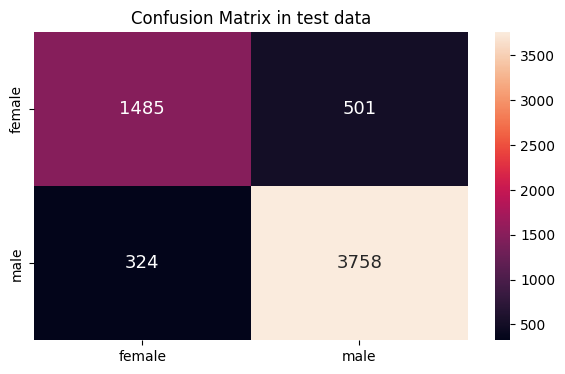

In [59]:
cm = confusion_matrix(Y_test, Y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['female','male'], 
                     columns = ['female','male'])
plt.figure(figsize=(7,4))
sb.heatmap(cm_df, annot=True, fmt='d', annot_kws={'size':13}, color= 'blue')
plt.title('Confusion Matrix in test data')
plt.show()